# Homework 03

## 1. Import

### 1.1 Import packages 

In [80]:
# import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### 1.2 Import data

In [50]:
# variable data
df = pd.read_csv("data/bank-full.csv", delimiter=';')

In [51]:
# display the first 5 rows of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2. Questions

### 2.0 Data preparation

In [52]:
# select a subset of columns
col = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [53]:
# Reducing the dataset
df = df[col]

In [54]:
# display the irst 2 rows of the dataframe
df.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no


In [55]:
# checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no empty values in the selected columns of the dataframe

### 2.1 Question 1
What is the most frequent observation for the column ``education``?

In [56]:
# checking the most frequent observation for the column education
df['education'].mode()


0    secondary
Name: education, dtype: object

### 2.2 Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

In [57]:
# checking the types of the df
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [58]:
# creating a variable for the numerical columns
numerical = list(df.select_dtypes(include=['int']))

In [59]:
# creating a variable for the categorical columns
categorical = list(df.select_dtypes(include=['object']))

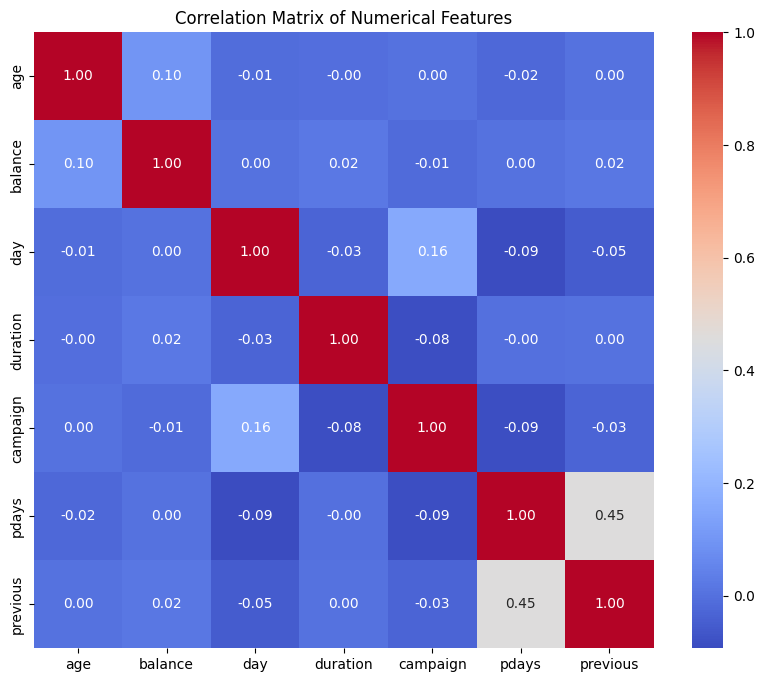

In [60]:
# Calculate the correlation matrix
correlation_matrix = df[numerical].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Beween the demanded correlations, ``pdays``and ``previous`` has the biggest ones

#### Target Encoding

In [61]:
# Encoding target values into numbers
df.y = (df['y'] == 'yes').astype(int)

In [62]:
# display the first two rows of the 'y' column
df.y.head(2)

0    0
1    0
Name: y, dtype: int64

#### Data Splitting

In [63]:
# split the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [64]:
# creating a validation set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [65]:
# displaying the len of the data
len(df_train), len(df_val), len(df_test)  

(27126, 9042, 9043)

In [66]:
# reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
# defining the target variable
y_train = df_train.y.values
y_val = df_val.y.values

In [68]:
# deleting the target variable from the data
del df_train['y']
del df_val['y']

### 2.3 Question 3
- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

In [69]:
# removing y from categorical list
categorical.remove('y')

In [70]:
# creating a function to calculate the mutual information
def mutual_info_y_score(series):
    score = mutual_info_score(series, df_full_train.y)
    return round(score,2)

In [71]:
# calculating the mutual information for each categorical feature
mi = df_full_train[categorical].apply(mutual_info_y_score).sort_values(ascending=False)
print(mi)

poutcome     0.03
month        0.02
job          0.01
housing      0.01
contact      0.01
marital      0.00
education    0.00
dtype: float64


The `poutcome`has the highest mutual information score

### 2.4 Question 4
Logistic Regression

#### One Hot Encoding

In [72]:
# creating a dictionary of the data
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [73]:
# creating an instance of the DictVectorizer
dv = DictVectorizer(sparse=False)
# fitting the data
X_train = dv.fit_transform(train_dict)
X_train.shape

(27126, 47)

In [74]:
# creating a dictionary of the data
val_dict = df_val[categorical + numerical].to_dict(orient='records')
# transform the validation data
X_val = dv.transform(val_dict)

#### Logistic Regression

In [76]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [81]:
# Convert predicted probabilities to binary outcomes
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


### 2.5 Question 5

In [104]:
# List of features to evaluate
features_to_evaluate = ['age', 'balance', 'previous','marital=divorced', 'marital=married', 'marital=single']

In [109]:
# Dictionary to store the accuracy differences
accuracy_differences = {}

# Evaluate each feature
for feature in features_to_evaluate:
    # Exclude the feature from the dataset
    feature_index = dv.get_feature_names_out().tolist().index(feature)
    X_train_excluded = np.delete(X_train, feature_index, axis=1)
    X_val_excluded = np.delete(X_val, feature_index, axis=1)
    
    # Train a new model without the feature
    model_excluded = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_excluded.fit(X_train_excluded, y_train)
    y_pred_excluded = model_excluded.predict_proba(X_val_excluded)[:, 1]
    y_pred_binary_excluded = (y_pred_excluded >= 0.5).astype(int)
    accuracy_excluded = accuracy_score(y_val, y_pred_binary_excluded)
    
    # Calculate the accuracy difference
    accuracy_difference = accuracy_excluded - accuracy
    accuracy_differences[feature] = accuracy_difference
    # Print the accuracy differences
    print(f"Accuracy without {feature}: {accuracy_excluded:.2f}, Difference: {accuracy_difference:}")

    # Rank the features by their accuracy differences
    ranked_features = sorted(accuracy_differences.items(), key=lambda x: x[1], reverse=True)

Accuracy without age: 0.90, Difference: -0.00011059500110588427
Accuracy without balance: 0.90, Difference: -0.00011059500110588427
Accuracy without previous: 0.90, Difference: -0.00033178500331787486
Accuracy without marital=divorced: 0.90, Difference: 0.00022119000221187957
Accuracy without marital=married: 0.90, Difference: -0.00022119000221187957
Accuracy without marital=single: 0.90, Difference: -0.00044238000442375913


### 2.6 Question 6

In [112]:
# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store the accuracy for each C value
accuracy_results = {}

# Train and evaluate the model for each C value
for C in C_values:
    # Create and train the model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    y_pred = model.predict_proba(X_val)[:, 1]
    
    # Convert predicted probabilities to binary outcomes
    y_pred_binary = (y_pred >= 0.5).astype(int)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_pred_binary)
    
    # Store the accuracy rounded to 3 decimal digits
    accuracy_results[C] = round(accuracy, 3)

# Print the accuracy results
for C, acc in accuracy_results.items():
    print(f"C={C}: Accuracy={acc}")

C=0.01: Accuracy=0.898
C=0.1: Accuracy=0.901
C=1: Accuracy=0.901
C=10: Accuracy=0.901
C=100: Accuracy=0.9
